# Fitness Performance Machine Learning Project

# Dataset Overview

This dataset captures fitness performance indicators of individuals, focusing on age, body measurements, and physical test results such as grip strength, flexibility, sit-ups, and jump distance.
The goal of this project is to predict an individual’s performance class (A–D) representing overall fitness level based on physiological, and exercise-related attributes.

## Table of Contents

1. [Dataset Overview & Features](#dataset-overview--features)  
2. [Introduction](#introduction)  
3. [Import Libraries](#import-libraries)  
4. [Data Preprocessing](#data-preprocessing)  
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)  
6. [Model Development](#model-development)  
7. [Model Evaluation](#model-evaluations)    
8. [Conclusion](#conclusion)  
  

---

##  Dataset Overview & Features <a id="dataset-overview--features"></a>

This dataset contains physical fitness and health-related attributes of individuals.
The goal is to predict a person’s performance class (A, B, C, or D) representing their overall fitness level based on demographic, physiological, and exercise performance features.

### Features

| Feature | Description 
|---------|-------------|
| Age | Age of the individual (in years). |
| Gender | Gender of the individual (Male/Female). |
| Height(cm) | Body height measured in centimeters. |
| Weight(kg) | Body weight measured in kilograms.|
| Body Fat(%) | Percentage of body fat in the individual.|
| Diastolic | Diastolic blood pressure (lower reading). |
| Systolic | Systolic blood pressure (upper reading). |
| Grip Force | Strength of hand grip measured using a dynamometer. |
| Sit and Bend Forward(cm) | Flexibility test result measured in centimeters. |
| Sit-ups Count | NNumber of sit-ups completed within a time frame. |
| Broad Jump(cm) | Distance jumped in the standing broad jump test (in centimeters). |


### Target Variable

Target Variable

Performance Class Categorical outcome with classes A–D, representing the individual’s overall fitness level.
Higher classes (e.g., A) indicate better physical fitness, while lower classes (e.g., D) suggest lower performance levels.









### Import Libraries

In [2]:
#Multi Classification and implement same on real-world dataset using One-vs-All(OvA) and One-vs-One(OvO)

#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Libraries Imported

## Data Loading and Structure

In [3]:
filepath = 'bodyPerformance.csv'
df = pd.read_csv(filepath)
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

### No missing values detected

In [6]:
df.duplicated().sum()

np.int64(1)

#### No duplicate rows found

### Descriptive Statistics

In [4]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


## Data Visualization

Text(0.5, 1.0, 'Distribution Of Performance Grades')

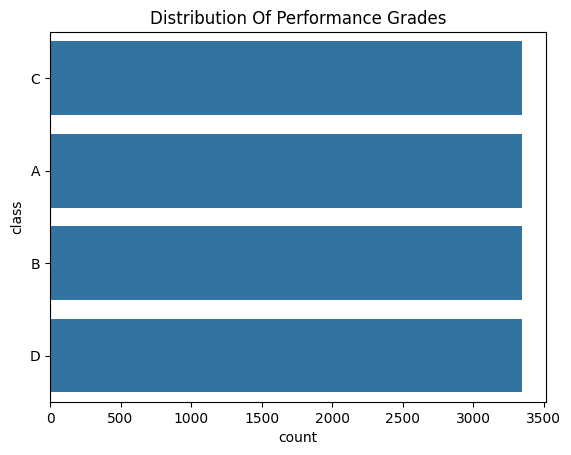

In [7]:
sns.countplot(y = 'class', data=df)
plt.title('Distribution Of Performance Grades')

<Axes: xlabel='gender', ylabel='class'>

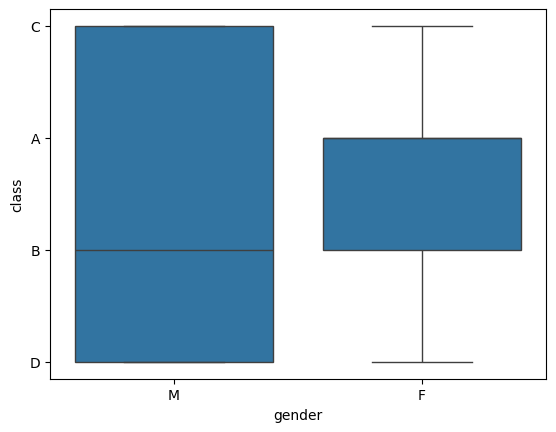

In [9]:
sns.boxplot(x='gender', y='class', data=df)

## Data Preprocessing and Preparation

### Encoding Numarical Columns

In [11]:
# Standardizing
continuous_columns = df.select_dtypes(include=['float64']).columns.to_list()

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df[continuous_columns])

#Converting to a Dataframe
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

#Combining with original dataset
scaled_data = pd.concat([df.drop(columns=continuous_columns), scaled_df], axis=1)

### Encoding Categorical Columns

In [13]:
#Identifying Categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.to_list()
categorical_columns.remove('class')

#Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

#Converting to a dataframe
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

#Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

### Encoding Target Column

In [14]:
#Encoding the target variable
prepped_data['class'] = prepped_data['class'].astype('category').cat.codes

### Preparing Final Dataset

In [ ]:
X = prepped_data.drop('class', axis=1)
y = prepped_data['class']

NameError: name 'prepped_data' is not defined

### Splitting the Dataset
The dataset was divided into training and testing sets for model development and evaluation.

In [16]:
#Stratify ensures equal distribution of each class(target) to train with
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67, stratify=y)

## Model Development: Logistic Regression (OvA vs OvO)

To predict the **fitness performance class (A–D)**, a **Logistic Regression** model was trained using two multi-class classification strategies:

1. **One-vs-All (OvA)** — trains one model per class against all others.
2. **One-vs-One (OvO)** — trains one model for every pair of classes.


**One-vs-All (OvA)** — trains one model per class against all others.

In [17]:
#Training logistic regression model using One Vs All(default)
# OVR means the model is trained on one logistic regression per class => so A vs (B,C,D) aand vice versa
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000) #Iterations improve the accuracy of the mode,
model_ova.fit(X_train, y_train)

c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'ovr'


In [18]:
y_pred_ova = model_ova.predict(X_test)

#Evaluation metrics for OvA
print('One-Vs-All (OvA) Strategy')
print(f'Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova), 2)}%')
print(F'Error {mean_squared_error(y_test, y_pred_ova)}')

One-Vs-All (OvA) Strategy
Accuracy: 59.28%
Error 0.6401642403882045


**One-vs-One (OvO)** — trains one model for every pair of classes.

In [19]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'


In [20]:
y_pred_ovo = model_ovo.predict(X_test)

#Evaluations 
print("OVO Strat")
print(f'Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo), 2)}%')
print(F'Error {mean_squared_error(y_test, y_pred_ovo)}')

OVO Strat
Accuracy: 62.75%
Error 0.528555431131019


### Evaluating Different Test Sizes
To test model stability, different test splits were evaluated (10% and 30% test sizes).

In [21]:
for test_size in [0.1, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=67, stratify=y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f'Test Size: {test_size}')
    print("Accuracy", accuracy_score(y_test, y_pred))

c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Oribi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Size: 0.1
Accuracy 0.6007462686567164
Test Size: 0.3
Accuracy 0.5888501742160279


# Model Prediction Visualizations

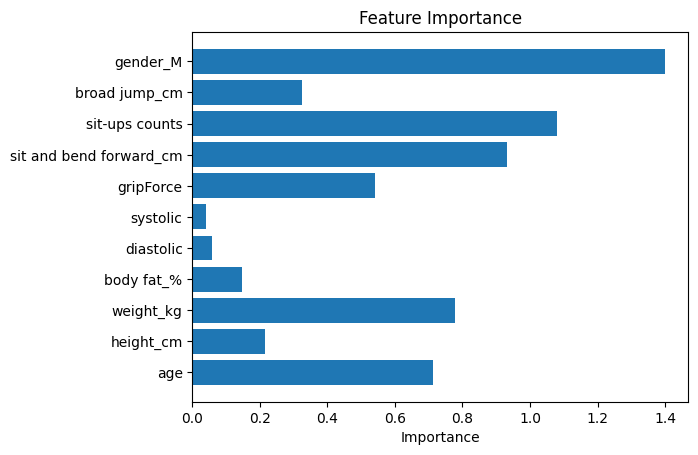

Text(0.5, 0, 'Importance')

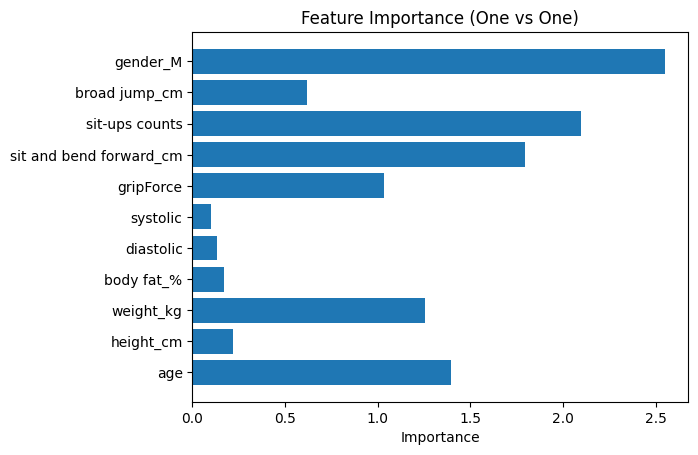

In [22]:
#Feature Importance
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

#For One vs One model
# Collect all coefficeints from each underluing binary classifier
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

#Now take the mean across all those classifiers
feature_importance = np.mean(np.abs(coefs), axis=0)

plt.barh(X.columns, feature_importance)
plt.title('Feature Importance (One vs One)')
plt.xlabel("Importance")

# Linear Regression Model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lin = lin_reg.predict(X_test)

# Evaluate
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Results")
print(f"Mean Squared Error (MSE): {mse_lin}")
print(f"R² Score: {r2_lin}")



Linear Regression Results
Mean Squared Error (MSE): 0.4918297592005268
R² Score: 0.6065361146502843


# Polynomial Regression Model


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predict
y_pred_poly = poly_reg.predict(X_poly_test)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Results")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R² Score: {r2_poly}")

Polynomial Regression Results
Mean Squared Error (MSE): 0.40663615755806837
R² Score: 0.6746910094733745
